# Nivell 1

Recordatori:

* Heu de fer aquesta activitat amb _IntelliJ Ultimate_
* Directori on heu de clonar aquest repositori: ```~/IdeaProjects```

## Introducció: Inversion of Control (IoC)

**IoC** (Inversion of Control) és un patró de disseny en programació, que es fa servir a Srping. És el patró més important. **Significa que el programador no és l'encarregat de crear els objectes, sinó que serà el mateix framework (en aquest cas, el framework Spring) qui crearà els objectes que siguin necessaris**. Això serà possible perquè Spring té, internament, una fàbrica (**factory**) d'objectes.

## Procés de desenvolupament d'una aplicació Spring

Les passes a seguir sempre són:

1. Configuració dels beans.
2. Creació del contenidor d'Spring (o contexte).
3. Obtenir els beans creats pel contenidor.

Aquest procés està explicat detalladament en els exemples que trobareu als vídeos:

[Vídeo 01](https://youtu.be/lTH6_3-7ERE)

[Vídeo 02](https://youtu.be/htbuuvqUlpA)

[Vídeo 03](https://youtu.be/L2zHyfkGk3c)

[Vídeo 04](https://youtu.be/u8Ocr--ZAiE)


## Exercici 1

Seguint els exemples dels primers 4 vídeos, has de crear un projecte IntelliJ anomenat ``spring-demo-one`` en el qual crearà dues classes main:

- Incialment, una classe main anomenada Main, en la qual tu, com a programador, crearàs els objectes de tipus Coach.
- Posteriorment, faràs servir el framwork d'Spring, i seguint les passes del procés de desenvolupament, en una nova classe main anomenada HelloSpringApp, deixaràs que el control de la creació dels beans (objectes) el dugui el contenidor d'Spring.

Comprova que l'aplicació funciona tal i com es veu en els vídeos.

Finalment, afegeix un nou entrenador, de l'esport que vulguis, i des de HelloSpringApp, comprova que també funciona, canviant adequadament el fitxer de configuració XML.

## DEPENDENCY INJECTION (DI)

Spring està basat en dos principis:

- Inversion Of Control (IoC), que ja s'ha explicat.
- Dependency Injection (DI)

**El principi de la inversió de dependències**:

> L'aplicació client no s'encarrega per sí mateixa de crear o obtenir els objectes que necessiti, sinó que **delega a un altre objecte la responsabilitat de proveir-li les dependències que necessiti**.

Les dependències no són altra cosa que els objectes, o beans, que l'aplicació client necessita per a funcionar.



En el següent exemple tenim una aplicació (Client App, que nosaltres desenvolupem) que **necessita** un cotxe, és a dir depèn d'un bean o objecte de tipus ``Car``, per a poder funcionar. Però la nostra aplicació **no crea l'objecte Car**, sinó que delega a un altre objecte (en aquest cas, la ``Car Factory``) la creació d'aquest bean Car. La fàbrica de cotxes (Car Factory) s'encarregarà de crear totes les parts (tots els objectes) que un cotxe necessita (rodes, volants, portes, motor, etc...) i construirà (fabricarà) el cotxe. Un cop el bean ``Car`` està creat, l'**injectarà** a l'aplicació client.

![di](images/spring-di-car.png)

### Tipus d'injecció de dependències

Hi ha diferents tipus d'injecció de dependències, però en aquesta activitat treballarem, amb Spring, els dos tipus principals:

- Constructor Injection
- Setter Injection

## Exercici 2 (Constructor Injection)

Continuant amb l'exemple dels entrenadors de l'exercici 1, teníem que, de moment, un ``Coach`` té un mètode ``getDailyPractice()`` i prou. Però la nostra aplicació pot evolucionar i fer-se més complexe, de manera que un ``Coach`` necessiti d'altres objectes, de la mateixa manera que un ``Car`` pot necessitar ``Motor``, ``Wheel``, etc... 

Per exemple, un entrenador pot necessitar les **estadístiques de cada partit**: en aquest cas haurem d'afegir un mètode anomenat ``getLastGameStats()`` (_dona'm les estadístiques de l'últim partit_), per exemple, o un mètode anomenat ``getGameStats(Game game)``, per a indicar de quin partit l'entrenador vol les estadístiques.



En tot cas, tots aquests objectes complementaris que poden arribar a ser necessaris per a construir un objecte ``Coach`` els anomenem **dependències** o **helper objects**. Així **tindrem un altre objecte que serà l'encarregat de calcular les estadístiques d'un partit i servir-les a l'entrenador quan aquest les hi ho demani**.

> El mètode ``getLastGameStats()`` de Coach demanarà les estadístiques a un objecte helper, o dependència, anomenat, per exemple, ``GameStatsService``.

Així, un ``Motor`` és una dependència per a construir un ``Car``, com també un objecte ``GameStatsService`` que calculi i encapsuli les estadístiques d'un partit, podria arribar a ser una dependència per a crear un ``Coach`` (si en la nostra aplicació així ho determinem).

A una aplicació Spring, el contenidor d'Spring (o _context_, que conté una factoria de beans) serà l'encarregat de crear els objectes, de fabricar-los:

![di](images/spring-di-coach2.png)

**En aquest exercici aplicareu Dependency Injection del tipus _Constructor Injection_ a l'exemple de l'aplicació dels entrenadors (Coach).**

Les passes a fer són:

> 1. Definir la interfície i la classe (de la dependència).
> 2. Crear un constructor a la teva classe per fer les injeccions.
> 3. Configurar l'injecció de dependències a un fitxer de configuració d'Spring.

**En aquest exercici heu de fer l'exemple de DI que trobareu al següent vídeo explicat**, i que utilitza el mateix projecte IntelliJ que en els vídeos anteriors:

[Vídeo 05](https://youtu.be/y31IWI4YXBI)

Un cop fet l'exemple explicat al vídeo (DI usant el BasketballCoach) **heu de repetir el mateix per al GymCoach i per al Coach qe hagueu creat en l'exercici 1**.

## Teoria: àmbit dels beans

En els exemples que hem anat veient, tenim:

```java
Coach coach = context.getBean("basketballCoach", Coach.class);
```

Si més tard, en el nostre programa, necessitem un altre _coach_, podrem afegir una altra línia de codi equivalent a l'anterior:


```java
Coach coach2 = context.getBean("basketballCoach", Coach.class);
```

***
La pregunta que ens fem és: **``coach`` i ``coach2`` apunten a objectes diferents, o al mateix objecte?**, és a dir, **Spring crea només un objecte de tipus ``Coach`` per a tota l'aplicació** (i el va assignant a diferents variables) **o crea diferents objectes del mateix tipus (Coach) que va assignant, cada objecte, a cada variable?**

---

La resposta és: depèn de l'àmbit (_scope_) amb què el _bean_ s'hagi configurat (en aquest exemple, del bean Coach).

> Si l'àmbit del bean és **Singleton**, Spring només crearà **un únic objecte**, que serà compartit per totes les variables (totes les variables apuntaran al mateix objecte en memòria). **Aquest és l'àmbit per defecte**.

> Si l'àmbit del bean és **Prototype**, Spring crearà tants objectes com variables, és a dir, tants beans com vegades cridem el mètode ``context.getBean()``. Per tant, **cada variable apuntarà** o referenciarà un **objecte diferent**.

#### Singleton scope

El codi XML és:

```xml
<beans ...>
    <bean id="myCoach"
          class="cat.ilg.springdemo.BasketballCoach"
          scope="singleton">
        ...
    </bean>
</beans>
```

Si no posem l'atribut _scope_, l'àmbit per defecte és aquest: singleton.

![spring-singleton](images/spring-singleton.png)

#### Prototype scope

El codi XML és:

```xml
<beans ...>
    <bean id="myCoach"
          class="cat.ilg.springdemo.BasketballCoach"
          scope="prototype">
        ...
    </bean>
</beans>
```

![spring-prototype](images/spring-prototype.png)

### Altres àmbits dels beans

En el següent quadre veiem que hi ha altres àmbits per als beans, a banda del _singleton_ i del _prototype_. Els àmbits aplicables a aplicacions web els veurem en els corresponents exemples d'aplicacions web:

![spring-scopes](images/spring-scopes.png)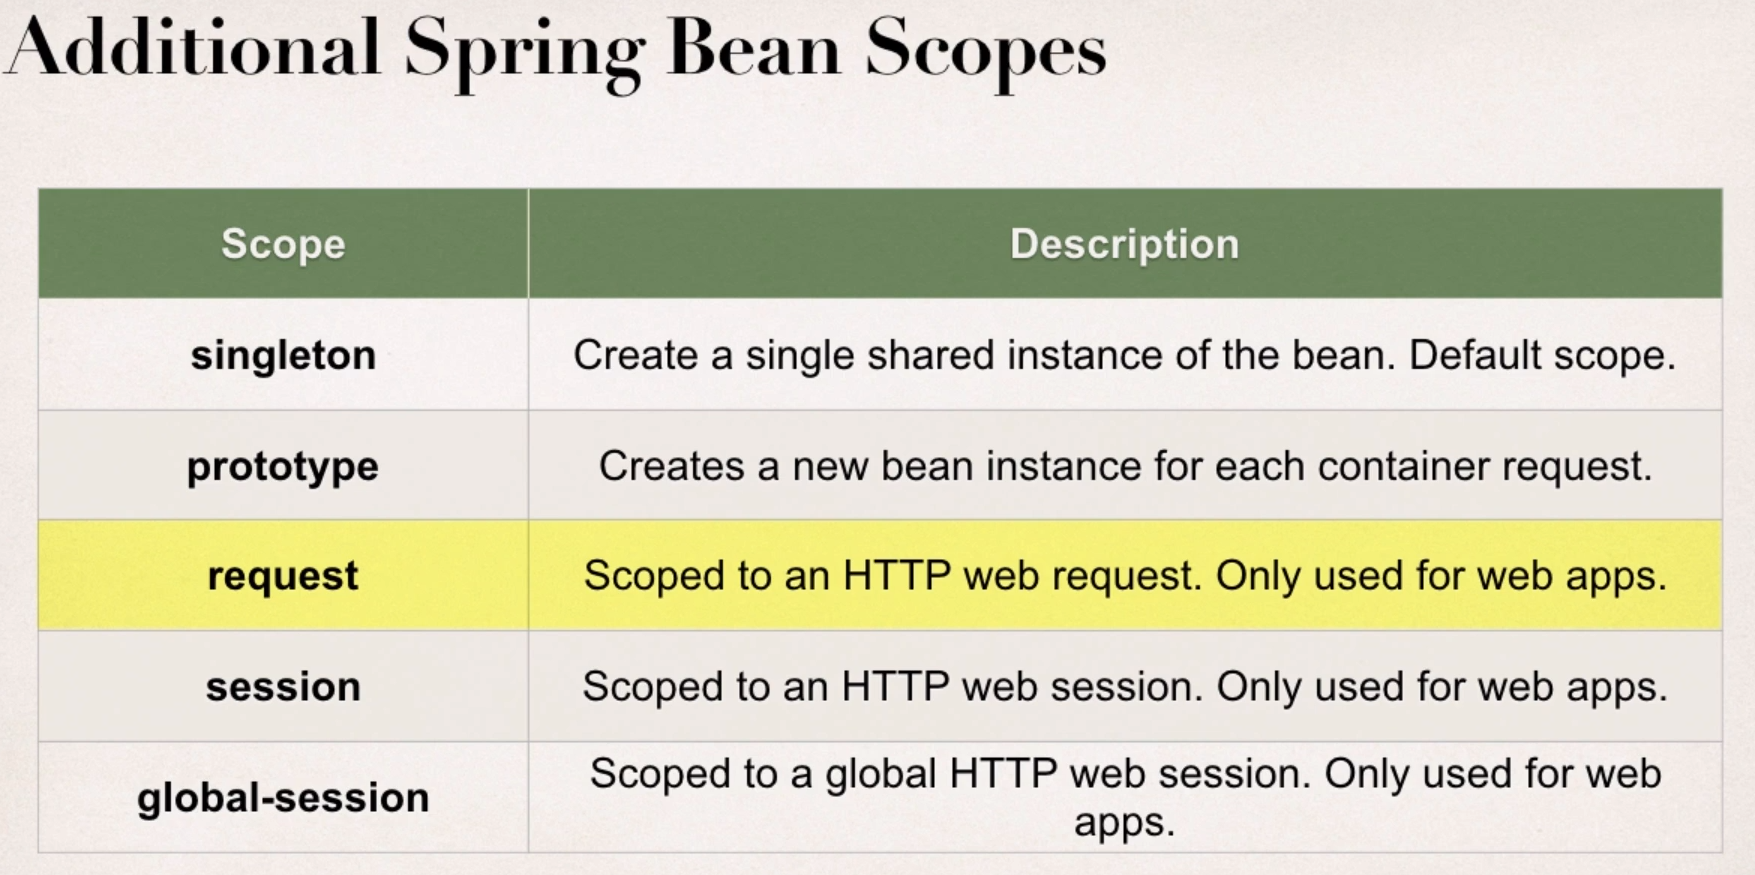

## Exercici 3 (Bean Scope)

En aquest exercici, i seguint utilitzant el mateix projecte IntelliJ, heu de comprovar els àmbits **singleton** i **prototype** que poden tenir els beans en una aplicació Spring.

Ho heu de fer seguint l'exemple explicat en el següent vídeo:

[Vídeo 09](https://youtu.be/Ton_r-CLXVk)

Atenció: en aquest vídeo manca tancar el context. Cal afegir ``context.close()``.

## Teoria: Bean LifeCycle

De moment hem vist exemples en què Spring crea els beans de l'aplicació, i els hi injecta les dependències que aquests beans necessiten.

Ara veurem **com podem fer que Spring també afageixi codi (mètodes) addicionals als beans que crea**.

> Mètodes addicionals poden ser necessaris si volem posar en una funció, o varies, la lògica de negoci; també poden ser necessaris per a obrir o tancar connexions a recursos, com ara connexions a una base de dades.

> Els mètodes addicionals que habitualment són necessaris solen ser **mètodes d'inicialització** (a executar quan s'inicia l'aplicació) o **mètodes de finalització** (o destrució) (a executar quan l'aplicació finalitza).

En el següent diagrama podem veure el cicle de vida d'un bean dins d'una aplicació Spring, des que aquesta comença amb l'instanciació del contenidor d'Spring, fins que l'aplicació finalitza la seva execució i s'atura (stop). Veiem com hi ha dos punts (inicialització i finalització) en què podem dir-li a Spring que afegeixi mètodes addicionals:

![spring-bean-lifecycle](images/spring-bean-lifecycle.png)

Per exemple, en un mètode d'inicialització (_init method_) podem obrir una connexió a una base de dades, i en un mètode de finalització (_destroy method_) podrem fer que aquesta connexió a la base de dades es tanqui.

Aquests mètodes addicionals s'anomenen també _**hooks**_ (ganxos):

![spring-hooks](images/spring-hooks.png)

#### **Les passes per afegir HOOKS a la nostra aplicació Spring són**:

1. Definiu els mètodes per a la inicialització (init) i finalització (destroy).
2. Configureu els noms dels mètodes en el fitxer de configuració d'Spring.

**Com queda la configuració xml?**

Suposant que hem creat els mètodes ``doMyStartupStuff()`` i ``doMyCleanupStuff()``, la configuració XML quedarà així:

```xml
<beans>
   <bean id="myCoach"
      class="cat.ilg.springdemo.BasketballCoach"
      init-method="doMyStartupStuff"
      destroy-method="doMyCleanupStuff">
      ...
      </bean>
</beans>
```

#### **Quines característiques han de complir els Hooks init i destroy?**

**Access modifier**:
The method can have any access modifier (public, protected, private)

**Return type**:
The method can have any return type. However, "void' is most commonly used. If you give a return type just note that you will not be able to capture the return value. As a result, "void" is commonly used.

**Method name**:
The method can have any method name.

**Arguments**:
The method **can not accept any arguments**. The method should be no-arg.

## Exercici 4 (Bean LifeCycle)

En aquest exercici heu de fer crear i configurar dos mètodes _hooks_: l'**init** i el **destroy**. 

Heu de continuar amb el mateix projecte IntelliJ dels exercicis anteriors, i ho podeu fer seguint el següent vídeo:

[Vídeo 10](https://youtu.be/LnQv3DmVpMI)

**Nota:** El hook _destroy_ NO funciona si l'àmbit és _prototype_.

***
# Instruccions de preparació del Nivell 1 per al lliurament

## (A fer abans de fer el lliurament o de abans de passar al següent nivell)

**Abans de continuar al següent nivell o si vols fer el lliurament**: Fes un git add i un git commit de la branca _main_ del repositori clonat, amb el següent missatge: **Nom Cognom: nivell 1 acabat**.

> No oblidis de fer el git push !!!
